<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - More on Numerical Errors

Draga Pihler-Puzovic  
(c) University of Manchester  
January 2021

As usual, we first initialise our Python interpreter:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Numerical Precision in Calculations

When we do a numerical calculation in our (favourite) programming language, we initially don't really worry about what form our numbers are being processed in. Here, we are implicitly using integers without worrying much about them:

In [2]:
x = 10
for i in range (20):
    x = (x-9)*10
    print(x)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


We can explicitly check what form x has ended up as. Yes, it is an integer:

In [4]:
type(x)

int

Let's now do the same calculation, but explicitly with floating point numbers:

In [5]:
x = 10.0
for i in range (20):
    x = (x-9.0)*10.0
    print(x)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


Let's confirm the type for x:

In [6]:
type(x)

float

Now, we do the same calculation. At least, it looks similar enough. However, a problem emerges:

In [7]:
x = 1.0
for i in range (20):
    x = (x-0.9)/0.1
    print(x)

0.9999999999999998
0.9999999999999976
0.9999999999999754
0.9999999999997533
0.9999999999975329
0.9999999999753284
0.9999999997532838
0.9999999975328377
0.9999999753283773
0.9999997532837723
0.9999975328377231
0.9999753283772306
0.9997532837723055
0.9975328377230552
0.9753283772305521
0.7532837723055208
-1.4671622769447923
-23.67162276944792
-245.7162276944792
-2466.1622769447918


What is happening? 

In [8]:
y = 0.1
print(y)

0.1


So far, so good. But let's now explicitly display the number to greater precision, using the *format* command:

In [9]:
print('y = {:04.10f}'.format(y))

y = 0.1000000000


Seems okay so far. Let's look with even more precision:

In [10]:
print('y = {:04.30f}'.format(y))

y = 0.100000000000000005551115123126


It is no longer 0.1! This is because Python stores floating numbers using a *binary* representation. One consequence of binary representation:

In [11]:
0.1 + 0.1 + 0.1 == 0.3

False

In [2]:
10**(-20)/((3+10**(-20))-3)

ZeroDivisionError: float division by zero

Round-off error when calculating derivatives:

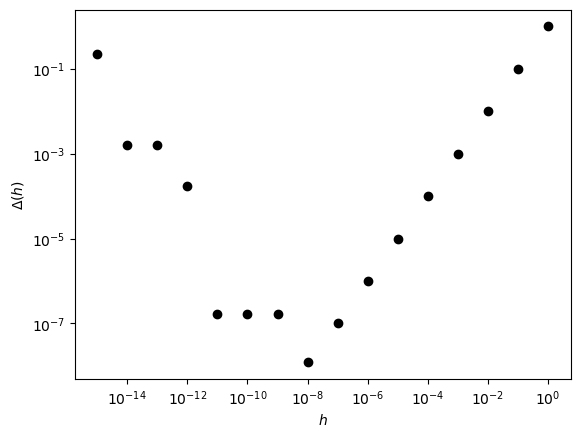

In [28]:
# Finding the derivative at x=1
x = 1

# definding the error depending on the step size h at the point x
def delta(x, h):
    return np.abs(2*x-((x+h)**2-x**2)/h)

# defining arrays to save the data in
H = np.zeros(16)
err = np.zeros(16)

# calculating the error saved in err for different step sizes saved in H
for i in range(16):
    H[i] = 1/(10**i)
    err[i] = delta(x, H[i])

# plotting the outcome
plt.loglog(H, err, 'ko')
plt.xlabel("$h$")
plt.ylabel("$\Delta(h)$")
plt.show()
